In [1]:
import pandas as pd
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from analysis.utils import optimise_model, plot_variable_importance, load_model, save_model, print_performance_measures, \
    plot_numeric_variable_importance

# Evaluate

In [7]:
df = pd.read_csv('../data/df_extensive_model_tw.csv', index_col=0)

X = df.drop('Value', axis=1)
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = load_model('extensive-model-xgb-tw')
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print_performance_measures(X_test, y_test, y_test_pred, file='performance-extensive-model-tw.csv')

RMSE:		3643391.3897
R^2:		0.5271
Adj. R^2:	0.0025


# Predict

In [2]:
df = pd.read_csv('../data/df_extensive_model_tw.csv', index_col=0)
df_clean = pd.read_csv('../data/df_clean.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)

results = pd.DataFrame(index=df_clean.index)

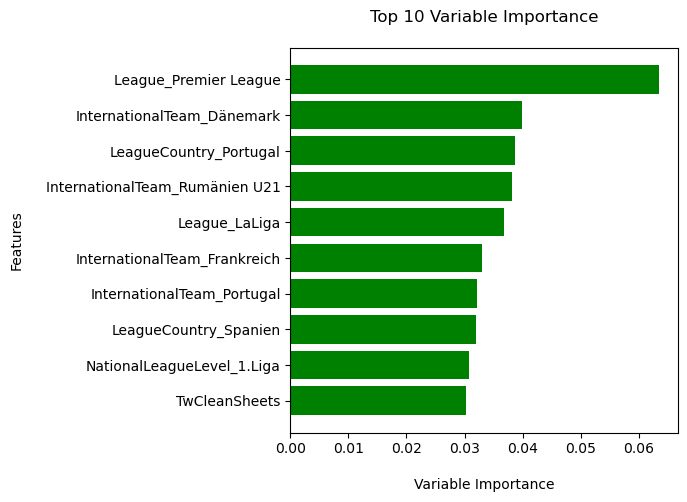

In [3]:
xgb_optimized = load_model('extensive-model-xgb-tw')
plot_variable_importance(xgb_optimized, X)

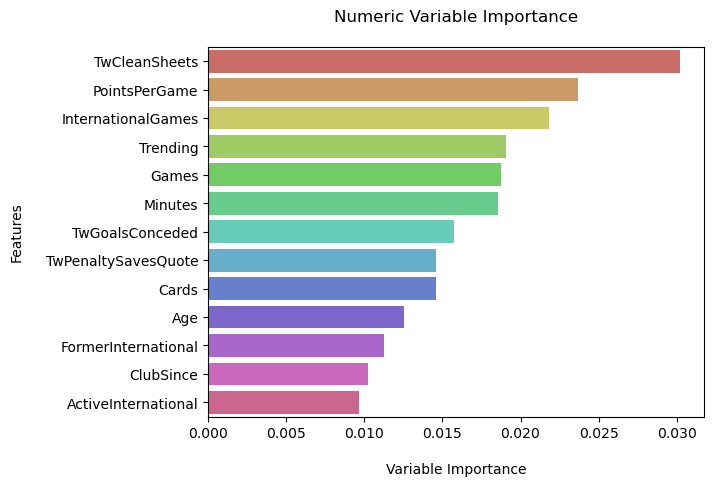

In [4]:
plot_numeric_variable_importance(xgb_optimized, X)

In [5]:
y_pred_xgb = xgb_optimized.predict(X)
y_pred_xgb = pd.DataFrame(index=df.index, data=y_pred_xgb)
results = pd.merge(results, y_pred_xgb, left_index=True, right_index=True, how='inner')
print_performance_measures(X, y, y_pred_xgb)

RMSE:		1462795.7518
R^2:		0.9272
Adj. R^2:	0.9173


In [6]:
results.to_csv('../data/df_extensive_model_tw_results.csv')

# Model Optimisation

In [2]:
df = pd.read_csv('../data/df_extensive_model_tw.csv', index_col=0)

y = df["Value"]
X = df.drop("Value", axis=1)

In [3]:
%%timeit -r 1 -n 1

param_dist = {
    "learning_rate": uniform(0.01, 0.5),
    "max_depth": randint(1, 10),
    "n_estimators": randint(50, 500),
    "gamma": uniform(0, 5),
    "subsample": uniform(0.1, 0.9),
    "colsample_bytree": uniform(0.1, 0.9),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

xgb_optimized, cv_results = optimise_model(XGBRegressor(), param_dist, X, y)

save_model(xgb_optimized, 'extensive-model-xgb-tw')

cv_results

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.47531980423231657, gamma=3.6016224672107904, learning_rate=0.010057187408672444, max_depth=6, n_estimators=385, reg_alpha=0.23608897695197606, reg_lambda=0.3965807272960261, subsample=0.44911966704580664; total time=   1.5s
[CV] END colsample_bytree=0.702771433123132, gamma=4.677695354030159, learning_rate=0.43315545834300856, max_depth=6, n_estimators=452, reg_alpha=0.5245481595728714, reg_lambda=0.44345289377955666, subsample=0.306619492356843; total time=   3.1s
[CV] END colsample_bytree=0.29991209278183734, gamma=0.36682085871299785, learning_rate=0.24461926321907157, max_depth=4, n_estimators=176, reg_alpha=0.28777533858634874, reg_lambda=0.13002857211827767, subsample=0.11743026208326737; total time=   0.5s
[CV] END colsample_bytree=0.7109519796459018, gamma=1.0581405800002952, learning_rate=0.14277332968611312, max_depth=8, n_estimators=193, reg_alpha=0.053362545117080384, reg_lambda=0.574